In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style("whitegrid")

In [3]:
data = pd.read_csv("DATA.csv")

### DATA ANALYSIS

In [5]:
data

,STUDENT ID;1;2;3;4;5;6;7;8;9;10;11;12;13;14;15;16;17;18;19;20;21;22;23;24;25;26;27;28;29;30;COURSE ID;GRADE
0,STUDENT1;2;2;3;3;1;2;2;1;1;1;1;2;3;1;2;5;3;2;2...
1,STUDENT2;2;2;3;3;1;2;2;1;1;1;2;3;2;1;2;1;2;2;2...
2,STUDENT3;2;2;2;3;2;2;2;2;4;2;2;2;2;1;2;1;2;1;2...
3,STUDENT4;1;1;1;3;1;2;1;2;1;2;1;2;5;1;2;1;3;1;2...
4,STUDENT5;2;2;1;3;2;2;1;3;1;4;3;3;2;1;2;4;2;1;1...
...,...
140,STUDENT141;2;1;2;3;1;1;2;1;1;2;1;2;2;2;2;4;3;3...
141,STUDENT142;1;1;2;4;2;2;2;1;4;2;1;1;5;1;2;1;3;2...
142,STUDENT143;1;1;1;4;2;2;2;1;1;1;3;4;4;1;2;4;2;2...
143,STUDENT144;2;1;2;4;1;1;1;5;2;3;4;4;1;1;3;3;2;2...


In [6]:
data.columns

Index(['STUDENT ID;1;2;3;4;5;6;7;8;9;10;11;12;13;14;15;16;17;18;19;20;21;22;23;24;25;26;27;28;29;30;COURSE ID;GRADE'], dtype='object')

In [21]:
columns = ["STUDENT ID", "Age","sex", "Graduated High School", "Scholarship", "Additional work", "Regular artistic or sports activity", "Do you have a partner", "Total salary if available",
"Transportation to the university", "Accommodation","Mothers Edu", "Fathers Edu", "No Bro/Sis", "Parental Status", "Mothers Ocu", "Fathers Ocu", "Weekly Study Hours",
"Read Freq 1", "Read Freq 2", "Attendance", "Impact of Projects", "Attend class", "Prep Mid 1", "Pred Mid 2", "Taking Notes", "Listening", "Discussion", "Flip class",
"CGPA", "ECGPA", "Course ID", "OUTPUT"]

In [25]:
rows = [[] for _ in range(33)]

count = 0
for i,row in enumerate(data['STUDENT ID;1;2;3;4;5;6;7;8;9;10;11;12;13;14;15;16;17;18;19;20;21;22;23;24;25;26;27;28;29;30;COURSE ID;GRADE']):
    r = row.split(";")
    for x,y in enumerate(r):
        rows[x].append(y)

In [32]:
d = {f:g for f,g in list(zip(columns, rows))}
new_data = pd.DataFrame(d)

In [33]:
new_data.head()

,STUDENT ID,Age,sex,Graduated High School,Scholarship,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Prep Mid 1,Pred Mid 2,Taking Notes,Listening,Discussion,Flip class,CGPA,ECGPA,Course ID,OUTPUT
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [37]:
grades = new_data["OUTPUT"].value_counts().values
n = ["DD","DC","CC","CB","BB","BA","AA","Fail"]

In [63]:
final = new_data.drop(["STUDENT ID"], axis=1).astype("Int64")

Text(0.5, 1.0, 'Distribution of Students Grades')

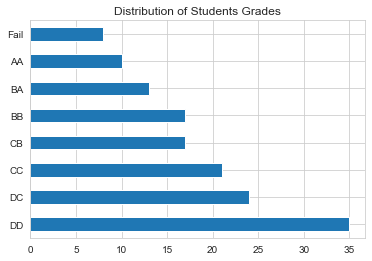

In [40]:
(pd.Series(grades, index=n)).plot(kind="barh")
plt.title("Distribution of Students Grades")

Text(0.5, 1.0, 'Distribution of CGPA')

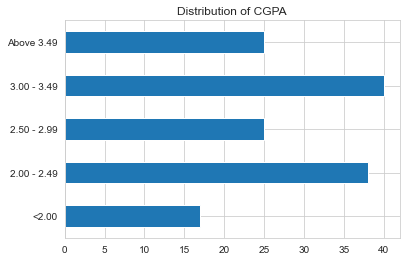

In [45]:
cgpa = ["<2.00", "2.00 - 2.49", "2.50 - 2.99", "3.00 - 3.49", "Above 3.49"]

c = new_data["CGPA"].value_counts().sort_index().values


(pd.Series(c, index=cgpa)).plot(kind="barh")
plt.title("Distribution of CGPA")

Text(0.5, 1.0, 'Expected CGPA in Graduation')

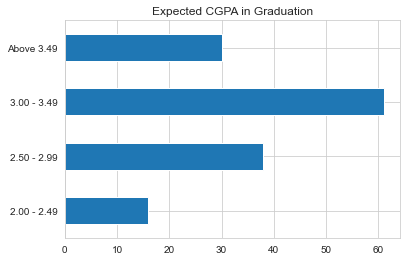

In [57]:
g = new_data["ECGPA"].value_counts().sort_index().values
(pd.Series(g, index=cgpa[1:])).plot(kind="barh")
plt.title("Expected CGPA in Graduation")

Text(0.5, 1.0, 'Distribution of Age')

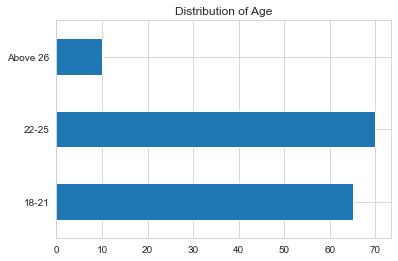

In [61]:
a = ["18-21","22-25", "Above 26"]
ag = new_data["Age"].value_counts().sort_index().values

(pd.Series(ag, index=a)).plot(kind="barh")
plt.title("Distribution of Age")

<AxesSubplot:>

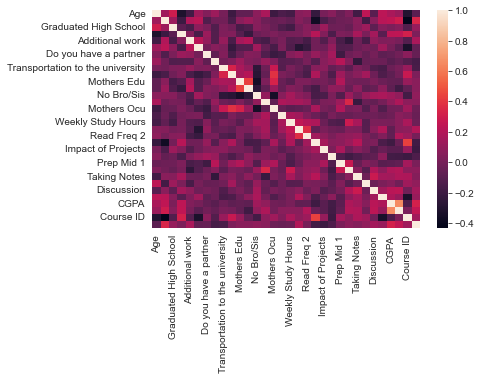

In [64]:
sns.heatmap(final.corr())

Text(0.5, 1.0, 'How does listening in class affects grade?')

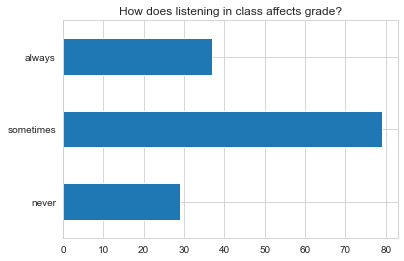

In [65]:
l = ["never", "sometimes", "always"]

li = new_data["Listening"].value_counts().sort_index().values

(pd.Series(li, index=l)).plot(kind="barh")
plt.title("How does listening in class affects grade?")

In [52]:
X = final.drop(["OUTPUT"], axis=1)
Y = final["OUTPUT"]